## Introduction to PyTorch

### Neural Frameworks

We have learnt that to train neural networks you need:
* Quickly multiply matrices (tensors)
* Compute gradients to perform gradient descent optimization

What neural network frameworks allow you to do:
* Operate with tensors on whatever compute is available, CPU or GPU, or even TPU
* Automatically compute gradients (they are explicitly programmed for all built-in tensor functions)

Optionally:
* Neural Network constructor / higher level API (describe network as a sequence of layers)
* Simple training functions (`fit`, as in Scikit Learn)
* A number of optimization algorithms in addition to gradient descent
* Data handling abstractions (that will ideally work on GPU, too)

### Most Popular Frameworks

* Tensorflow 1.x - first widely available framework (Google). Allowed to define static computation graph, push it to GPU, and explicitly evaluate it
* PyTorch - a framework from Facebook that is growing in popularity
* Keras - higher level API on top of Tensorflow/PyTorch to unify and simplify using neural networks (Francois Chollet)
* Tensorflow 2.x + Keras - new version of Tensorflow with integrated Keras functionality, which supports **dynamic computation graph**, allowing to perform tensor operations very similar to numpy (and PyTorch)

In this Notebook, we will learn to use PyTorch. You need to make sure that you have recent version of PyTorch installed - to do it, follow the [instructions on their site](https://pytorch.org/get-started/locally/). It is normally as simple as doing
```
pip install torch torchvision
```
or
```
conda install pytorch -c pytorch
```

#Connect to Python 3.10 - Pytorch and Tensorflow kernel

In [2]:
%pip install scikit-learn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
torch.__version__

'2.7.1+cu126'

## Basic Concepts: Tensor

**Tensor** is a multi-dimensional array. It is very convenient to use tensors to represent different types of data:
* 400x400 - black-and-white picture
* 400x400x3 - color picture 
* 16x400x400x3 - minibatch of 16 color pictures
* 25x400x400x3 - one second of 25-fps video
* 8x25x400x400x3 - minibatch of 8 1-second videos

### Simple Tensors

You can easily create simple tensors from lists of np-arrays, or generate random ones:

In [2]:
a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 1.4147, -0.6953,  0.3971],
        [ 1.3066, -0.6586,  1.0443],
        [-0.0221,  0.1886, -0.2690],
        [ 0.9019,  1.5151,  0.6001],
        [ 0.3117, -0.1885, -1.2212],
        [-0.1047,  0.0705,  0.5702],
        [-1.4849,  1.6602, -0.7808],
        [ 0.5358, -1.2027, -0.1513],
        [-0.3532,  1.2778,  0.1162],
        [ 0.6592, -0.7546,  0.1028]])


You can use arithmetic operations on tensors, which are performed element-wise, as in numpy. Tensors are automatically expanded to required dimension, if needed. To extract numpy-array from tensor, use `.numpy()`:

In [3]:
print(a-a[0])
print(torch.exp(a)[0].numpy())

tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.1081,  0.0367,  0.6473],
        [-1.4368,  0.8839, -0.6660],
        [-0.5128,  2.2104,  0.2030],
        [-1.1030,  0.5068, -1.6182],
        [-1.5194,  0.7658,  0.1731],
        [-2.8996,  2.3555, -1.1778],
        [-0.8790, -0.5074, -0.5484],
        [-1.7679,  1.9731, -0.2808],
        [-0.7556, -0.0593, -0.2943]])
[4.1153207 0.4989137 1.487453 ]


## In-place and out-of-place Operations

Tensor operations such as `+`/`add` return new tensors. However, sometimes you need to modify the existing tensor in-place. Most of the operations have their in-place counterparts, which end with `_`:

In [4]:
u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:", u)

Result when adding out-of-place: tensor(8)
Result after adding in-place: tensor(8)


This is how we can compute the sum or all rows in a matrix in a naive way:

In [5]:
s = torch.zeros_like(a[0])
for i in a:
  s.add_(i)

print(s)

tensor([3.1650, 1.2124, 0.4084])


But it is much better to use

In [6]:
torch.sum(a,axis=0)

tensor([3.1650, 1.2124, 0.4084])

You can read more on PyTorch tensors in the [official documentation](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

## Computing Gradients

For back propagation, you need to compute gradients. We can set any PyTorch Tensor's attribute `requires_grad` to `True`, which will result in all operations with this tensor being tracked for gradient calculations. To compute the gradients, you need to call `backward()` method, after which the gradient will become available using `grad` attribute:


In [7]:
a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))  # Do some math using `a`
c.backward() # call backward() to compute all gradients
# What's the gradient of `c` with respect to `a`?
print(a.grad)

tensor([[-0.2024,  0.1988],
        [ 0.2473,  0.2035]])


To be more precise, PyTorch automatically **accumulates** gradients. If you specify `retain_graph=True` when calling `backward`, computational graph will be preserved, and new gradient is added to the `grad` field. In order to restart computing gradients from scratch, we need to reset `grad` field to 0 explicitly by calling `zero_()`:  

In [8]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()
c.backward()
print(a.grad)

tensor([[-0.4047,  0.3976],
        [ 0.4947,  0.4071]])
tensor([[-0.2024,  0.1988],
        [ 0.2473,  0.2035]])


To compute gradients, PyTorch creates and maintains **compute graph**. For each tensor that has the `requires_grad` flag set to `True`, PyTorch maintains a special function called `grad_fn`, which computes the derivative of the expression according to chain differentiation rule:

In [10]:
print(c)

tensor(1.4349, grad_fn=<MeanBackward0>)


Here `c` is computed using `mean` function, thus `grad_fn` point to a function called `MeanBackward`.

In most of the cases, we want PyTorch to compute gradient of a scalar function (such as loss function). However, if we want to compute the gradient of a tensor with respect to another tensor, PyTorch allows us to compute the product of a Jacobian matrix and a given vector.

Suppose we have a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, then a gradient of $\vec{y}$ with respect to $\vec{x}$ is defined by a **Jacobian**:

$$
\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\end{align}
$$

Instead of giving us access to the whole Jacobian, PyTorch computes the product $v^T\cdot J$ of Jacobian with some vector
$v=(v_1 \dots v_m)$. In order to do that, we need to call ``backward`` and pass `v` as an argument. The size of `v` should be the same as the size of the original tensor, with respect to which we compute the gradient.


In [11]:
c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2)) # eye(2) means 2x2 identity matrix
print(a.grad)

tensor([[-1.0119,  0.1988],
        [ 0.2473,  1.0176]])


More on computing Jacobians in PyTorch can be found in [official documentation](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

# Example 0: Optimization Using Gradient Descent

Let's try to use automatic differentiation to find a minimum of a simple two-variable function $f(x_1,x_2)=(x_1-3)^2+(x_2+2)^2$. Let tensor `x` hold the current coordinates of a point. We start with some starting point $x^{(0)}=(0,0)$, and compute the next point in a sequence using gradient descent formula:
$$
x^{(n+1)} = x^{(n)} - \eta\nabla f
$$
Here $\eta$ is so-called **learning rage** (we will denote it by `lr` in the code), and $\nabla f = (\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2})$ - gradient of $f$.

To begin, let's define starting value of `x` and the function `f`:

In [12]:
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

Now let's do 15 iterations of gradient descent. In each iteration, we will update `x` coordinates and print them, to make sure that we are approaching the minimum point at (3,-2):

In [13]:
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

Step 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Step 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Step 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Step 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Step 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Step 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Step 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Step 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Step 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Step 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Step 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Step 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Step 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Step 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Step 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


## Example 1: Linear Regression

Now we know enough to solve the classical problem of **Linear regression**. Let's generate small synthetic dataset:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

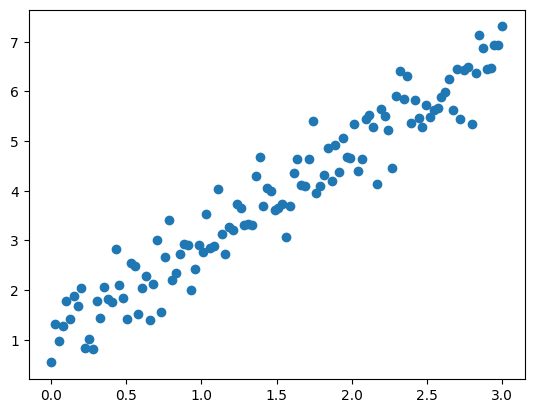

In [4]:
np.random.seed(13) # pick the seed for reproducibility - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

Linear regression is defined by a straight line $f_{W,b}(x) = Wx+b$, where $W, b$ are model parameters that we need to find. An error on our dataset $\{x_i,y_u\}_{i=1}^N$ (also called **loss function**) can be defined as mean square error:
$$
\mathcal{L}(W,b) = {1\over N}\sum_{i=1}^N (f_{W,b}(x_i)-y_i)^2
$$

Let's define our model and loss function:

In [7]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32)
# This is our bias vector
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
  return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
  return torch.mean(torch.square(labels - predictions))

We will train the model on a series of minibatches. We will use gradient descent, adjusting model parameters using the following formulae:
$$
\begin{array}{l}
W^{(n+1)}=W^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial W} \\
b^{(n+1)}=b^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial b} \\
\end{array}
$$

In [8]:
def train_on_batch(x, y):
  predictions = f(x)
  loss = compute_loss(y, predictions)
  loss.backward()
  w.data.sub_(learning_rate * w.grad)
  b.data.sub_(learning_rate * b.grad)
  w.grad.zero_()
  b.grad.zero_()
  return loss

Let's do the training. We will do several passes through the dataset (so-called **epochs**), divide it into minibatches and call the function defined above:

In [9]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)

In [10]:
batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


We now have obtained optimized parameters $W$ and $b$. Note that their values are similar to the original values used when generating the dataset ($W=2, b=1$)

In [11]:
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

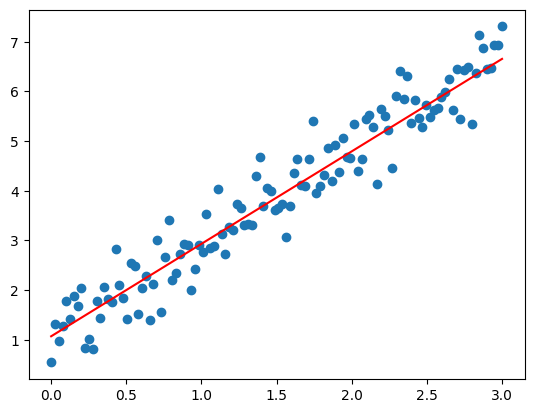

In [12]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
with torch.no_grad():
  y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')

## Computations on GPU

To use GPU for computations, PyTorch supports moving tensors to GPU and building computational graph for GPU. Traditionally, in the beginning of our code we define available computation device `device` (which is either `cpu` or `cuda`), and then move all tensors to this device using a call `.to(device)`. We can also create tensors on the specified device upfront, by passing the parameter `device=...` to tensor creation code. Such code works without changes both on CPU and GPU: 

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on '+device)

### Changes here: indicate device
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(output_dim,),requires_grad=True,device=device)

def f(x):
  return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
  return torch.mean(torch.square(labels - predictions))

def train_on_batch(x, y):
  predictions = f(x)
  loss = compute_loss(y, predictions)
  loss.backward()
  w.data.sub_(learning_rate * w.grad)
  b.data.sub_(learning_rate * b.grad)
  w.grad.zero_()
  b.grad.zero_()
  return loss

batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    ### Changes here: move data to required device
    loss = train_on_batch(features[i:i+batch_size].view(-1,1).to(device),labels[i:i+batch_size].to(device))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Doing computations on cuda
Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


## Example 2: Classification

Now we will consider binary classification problem. A good example of such a problem would be a tumour classification between malignant and benign based on it's size and age.

The core model is similar to regression, but we need to use different loss function. Let's start by generating sample data:


In [14]:
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.1,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [15]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

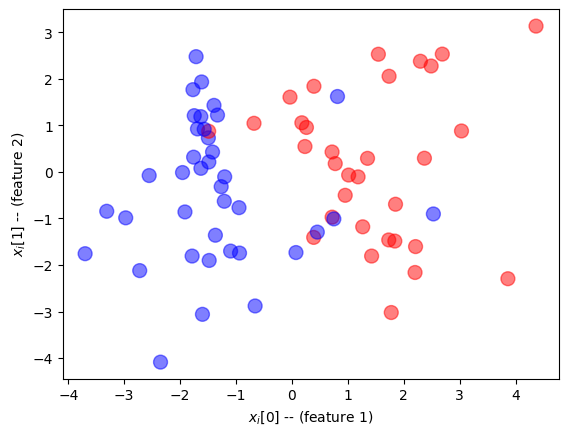

In [16]:
plot_dataset(train_x, train_labels)

## Training One-Layer Perceptron

Let's use PyTorch gradient computing machinery to train one-layer perceptron.

Our neural network will have 2 inputs and 1 output. The weight matrix $W$ will have size $2\times1$, and bias vector $b$ -- $1$.

To make our code more structured, let's group all parameters into a single class:

In [17]:
class Network():
  def __init__(self):
     self.W = torch.randn(size=(2,1),requires_grad=True)
     self.b = torch.zeros(size=(1,),requires_grad=True)

  def forward(self,x):
    return torch.matmul(x,self.W)+self.b

  def zero_grad(self):
    self.W.data.zero_()
    self.b.data.zero_()

  def update(self,lr=0.1):
    self.W.data.sub_(lr*self.W.grad)
    self.b.data.sub_(lr*self.b)

net = Network()

> Note that we use `W.data.zero_()` instead of `W.zero_()`. We need to do this, because we cannot directly modify a tensor that is being tracked using *Autograd* mechanism.

Core model will be the same as in previous example, but loss function will be a logistic loss. To apply logistic loss, we need to get the value of **probability** as the output of our network, i.e. we need to bring the output $z$ to the range [0,1] using `sigmoid` activation function: $p=\sigma(z)$.

If we get the probability $p_i$ for the i-th input value corresponding to the actual class $y_i\in\{0,1\}$, we compute the loss as $\mathcal{L_i}=-(y_i\log p_i + (1-y_i)log(1-p_i))$. 

In PyTorch, both those steps (applying sigmoid and then logistic loss) can be done using one call to `binary_cross_entropy_with_logits` function. Since we are training our network in minibatches, we need to average out the loss across all elements of a minibatch - and that is also done automatically by `binary_cross_entropy_with_logits` function: 

> The call to `binary_crossentropy_with_logits` is equivalent to a call to `sigmoid`, followed by a call to `binary_crossentropy`

In [18]:
def train_on_batch(net, x, y):
  z = net.forward(x).flatten()
  loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)
  net.zero_grad()
  loss.backward()
  net.update()
  return loss

To loop through our data, we will use built-in PyTorch mechanism for managing datasets. It is based on two concepts:
* **Dataset** is the main source of data, it can be either **Iterable** or **Map-style**
* **Dataloader** is responsible for loading the data from a dataset and splitting it into minibatches.

In our case, we will define a dataset based on a tensor, and split it into minibatches of 16 elements. Each minibatch contains two tensors, input data (size=16x2) and labels (a vector of length 16 of integer type - class number).

In [19]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x),torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

list(dataloader)[0]

[tensor([[ 1.5442,  2.5290],
         [-1.6284,  0.0772],
         [-1.7141,  2.4770],
         [-1.4951,  0.7320],
         [-1.6899,  0.9243],
         [-0.9474, -0.7681],
         [ 3.8597, -2.2951],
         [-1.3944,  1.4300],
         [ 4.3627,  3.1333],
         [-1.0973, -1.7011],
         [-2.5532, -0.0777],
         [-1.2661, -0.3167],
         [ 0.3921,  1.8406],
         [ 2.2091, -1.6045],
         [ 1.8383, -1.4861],
         [ 0.7173, -0.9718]]),
 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])]

Now we can loop through the whole dataset to train our network for 15 epochs:

In [20]:
for epoch in range(15):
  for (x, y) in dataloader:
    loss = train_on_batch(net,x,y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.5260
Epoch 1: last batch loss = 0.4409
Epoch 2: last batch loss = 0.3865
Epoch 3: last batch loss = 0.3483
Epoch 4: last batch loss = 0.3199
Epoch 5: last batch loss = 0.2978
Epoch 6: last batch loss = 0.2801
Epoch 7: last batch loss = 0.2654
Epoch 8: last batch loss = 0.2530
Epoch 9: last batch loss = 0.2424
Epoch 10: last batch loss = 0.2331
Epoch 11: last batch loss = 0.2250
Epoch 12: last batch loss = 0.2178
Epoch 13: last batch loss = 0.2113
Epoch 14: last batch loss = 0.2054


Obtained parameters:

In [21]:
print(net.W,net.b)

tensor([[1.3971],
        [0.3558]], requires_grad=True) tensor([0.], requires_grad=True)


To make sure our training worked, let's plot the line that separates two classes. Separation line is defined by the equation $W\times x + b = 0.5$

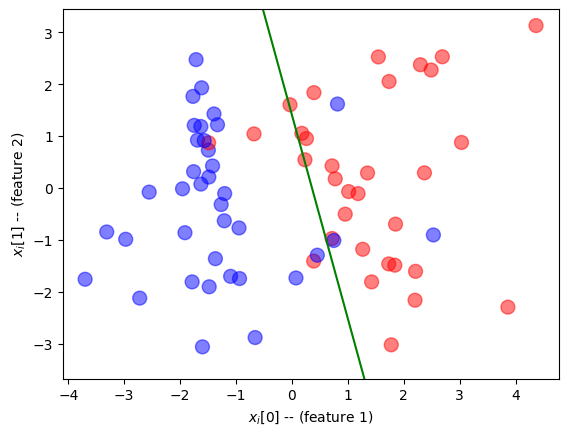

In [22]:
plot_dataset(train_x,train_labels,net.W.detach().numpy(),net.b.detach().numpy())

Not let's compute the accuracy on the validation dataset:

In [23]:
pred = torch.sigmoid(net.forward(torch.tensor(valid_x)))
torch.mean(((pred.view(-1)>0.5)==(torch.tensor(valid_labels)>0.5)).type(torch.float32))

tensor(0.8000)

Let's explain what is going on here:
* `pred` is the vector of predicted probabilities for the whole validation dataset. We compute it by running original validation data `valid_x` through our network, and applying `sigmoid` to get probabilities.
* `pred.view(-1)` creates a flattened view of the original tensor. `view` is similar to `reshape` function in numpy.
* `pred.view(-1)>0.5` returns a boolean tensor or truth value showing the predicted class (False = class 0, True = class 1)
* Similarly, `torch.tensor(valid_labels)>0.5)` creates the boolean tensor of truth values for validation labels
* We compare those two tensors element-wise, and get another boolean tensor, where `True` corresponds to correct prediction, and `False` - to incorrect.
* We convert that tensor to floating point, and take it's mean value using `torch.mean` - that is the desired accuracy 

## Neural Networks and Optimizers

In PyTorch, a special module `torch.nn.Module` is defined to represent a neural network. There are two methods to define your own neural network:
* **Sequential**, where you just specify a list of layers that comprise your network
* As a **class** inherited from `torch.nn.Module`

First method allows you to specify standard networks with sequential composition of layers, while the second one is more flexible, and gives an opportunity to express networks of arbitrary complex architectures. 

Inside modules, you can use standard **layers**, such as:
* `Linear` - dense linear layer, equivalent to one-layered perceptron. It has the same architecture as we have defined above for our network
* `Softmax`, `Sigmoid`, `ReLU` - layers that correspond to activation functions 
* There are also other layers for special network types - convolution, recurrent, etc. We will revisit many of them later in the course.

> Most of the activation function and loss functions in PyTorch are available in two form: as a **function** (inside `torch.nn.functional` namespace) and **as a layer** (inside `torch.nn` namespace). For activation functions, it is often easier to use functional elements from `torch.nn.functional`, without creating separate layer object.

If we want to train one-layer perceptron, we can just use one built-in `Linear` layer:

In [24]:
net = torch.nn.Linear(2,1) # 2 inputs, 1 output

print(list(net.parameters()))

[Parameter containing:
tensor([[0.1631, 0.1086]], requires_grad=True), Parameter containing:
tensor([-0.0047], requires_grad=True)]


As you can see, `parameters()` method returns all the parameters that need to be adjusted during training. They correspond to weight matrix $W$ and bias $b$. You may note that they have `requires_grad` set to `True`, because we need to compute gradients with respect to parameters.

PyTorch also contains built-in **optimizers**, which implement optimization methods such as **gradient descent**. Here is how we can define a **stochastic gradient descent optimizer**:

In [25]:
optim = torch.optim.SGD(net.parameters(),lr=0.05)

Using the optimizer, our training loop will look like this:

In [26]:
val_x = torch.tensor(valid_x)
val_lab = torch.tensor(valid_labels)

for ep in range(10):
  for (x,y) in dataloader:
    z = net(x).flatten()
    loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
  acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
  print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

Epoch 0: last batch loss = 0.540428102016449, val acc = 0.800000011920929
Epoch 1: last batch loss = 0.48786723613739014, val acc = 0.800000011920929
Epoch 2: last batch loss = 0.4471457898616791, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.41472792625427246, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.3883126676082611, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.366359144449234, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.3478046953678131, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.33189618587493896, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.31808626651763916, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.3059687316417694, val acc = 0.800000011920929


> You may notice that to apply our network to input data we can use `net(x)` instead of `net.forward(x)`, because `nn.Module` implements Python `__call__()` function

Taking this into account, we can define generic `train` function:

In [27]:
def train(net, dataloader, val_x, val_lab, epochs=10, lr=0.05):
  optim = torch.optim.Adam(net.parameters(),lr=lr)
  for ep in range(epochs):
    for (x,y) in dataloader:
      z = net(x).flatten()
      loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
      optim.zero_grad()
      loss.backward()
      optim.step()
    acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
    print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

net = torch.nn.Linear(2,1)

train(net,dataloader,val_x,val_lab,lr=0.03)

Epoch 0: last batch loss = 0.5611914396286011, val acc = 0.800000011920929
Epoch 1: last batch loss = 0.47586050629615784, val acc = 0.8666666746139526
Epoch 2: last batch loss = 0.40918099880218506, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.35819271206855774, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.31934747099876404, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.2895047962665558, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.2661949098110199, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.24759531021118164, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.2324131280183792, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.21975384652614594, val acc = 0.800000011920929


## Defining Network as a Sequence of Layers

Now let's train multi-layered perceptron. It can be defined just by specifying a sequence of layers. The resulting object will automatically inherit from `Module`, e.g. it will also have `parameters` method that will return all parameters of the whole network.

In [28]:
net = torch.nn.Sequential(torch.nn.Linear(2,5),torch.nn.Sigmoid(),torch.nn.Linear(5,1))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


We can train this multi-layered network using the function `train` that we have defined above:

In [29]:
train(net,dataloader,val_x,val_lab)

Epoch 0: last batch loss = 0.6041150689125061, val acc = 0.6666666865348816
Epoch 1: last batch loss = 0.5156541466712952, val acc = 0.6666666865348816
Epoch 2: last batch loss = 0.4256810247898102, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.33924317359924316, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.26419591903686523, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.2023409754037857, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.15374277532100677, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.11797261238098145, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.09375852346420288, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.07851335406303406, val acc = 0.800000011920929


## Defining a Network as a Class

Using a class inherited from `torch.nn.Module` is a more flexible method, because we can define any computations inside it. `Module` automates a lot of things, eg. it automatically understands all internal variables that are PyTorch layers, and gathers their parameters for optimization. You just need to define all layers of the network as members of the class:

In [30]:
class MyNet(torch.nn.Module):
  def __init__(self,hidden_size=10,func=torch.nn.Sigmoid()):
    super().__init__()
    self.fc1 = torch.nn.Linear(2,hidden_size)
    self.func = func
    self.fc2 = torch.nn.Linear(hidden_size,1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.func(x)
    x = self.fc2(x)
    return x
  
net = MyNet(func=torch.nn.ReLU())
print(net)

MyNet(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (func): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [31]:
train(net,dataloader,val_x,val_lab,lr=0.005)

Epoch 0: last batch loss = 0.866877555847168, val acc = 0.4000000059604645
Epoch 1: last batch loss = 0.8070764541625977, val acc = 0.4000000059604645
Epoch 2: last batch loss = 0.7529878616333008, val acc = 0.46666666865348816
Epoch 3: last batch loss = 0.7049916386604309, val acc = 0.46666666865348816
Epoch 4: last batch loss = 0.6615201830863953, val acc = 0.6666666865348816
Epoch 5: last batch loss = 0.6220412254333496, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.5855772495269775, val acc = 0.8666666746139526
Epoch 7: last batch loss = 0.5514413714408875, val acc = 0.8666666746139526
Epoch 8: last batch loss = 0.5191931128501892, val acc = 0.8666666746139526
Epoch 9: last batch loss = 0.48848757147789, val acc = 0.800000011920929


**Task 1**: Plot the graphs of loss function and accuracy on training and validation data during training

**Task 2**: Try to solve MNIST classificiation problem using this code. Hint: use `crossentropy_with_logits` as a loss function.

## Defining a Network as PyTorch Lightning Module

Let's wrap the written PyTorch model code in PyTorch Lightining module. This allows to work with your model more conveniently and flexibly using various Lightining methods for training and accuracy testing.

First we need to install and import PyTorch Lightining. This can be done with the command

```
pip install pytorch-lightning
```
or
```
conda install -c conda-forge pytorch-lightning
```

In [33]:
%pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 29.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 14.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 19.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 46.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 47.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 47.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 48.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.

In [34]:
import pytorch_lightning as pl

In order for our code to work in Lightning, we need to do the following:

1. Create a subclass of `pl.LightningModule` and add to it model architecture in `__init__` method and `forward` pass method.
2. Move used optimizer to the `configure_optimizers()` method.
3. Define the training and validation process in methods `training_step` and `validation_step` respectively.
4. (Optional) Implement a testing (`test_step` method) and prediction process (`predict_step` method).

It should also be understood that PyTorch Lightning has a built-in translation of models to different devices, depending on where the incoming data from the `DataLoaders` is located. Therefore, all calls `.cuda()` or `.to(device)` should be removed from the code.

In [35]:
class MyNetPL(pl.LightningModule):
    def __init__(self, hidden_size = 10, func = torch.nn.Sigmoid()):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,hidden_size)
        self.func = func
        self.fc2 = torch.nn.Linear(hidden_size,1)

        self.val_epoch_num = 0 # for logging

    def forward(self, x):
        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_nb):
        x, y = batch
        y_res = self(x).view(-1)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(y_res, y)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr = 0.005)
        return optimizer
    
    def validation_step(self, batch, batch_nb):
        x, y = batch
        y_res = self(x).view(-1)
        val_loss = torch.nn.functional.binary_cross_entropy_with_logits(y_res, y)
        print("Epoch ", self.val_epoch_num, ": val loss = ", val_loss.item(), " val acc = ",((torch.sigmoid(y_res.flatten())>0.5).float()==y).float().mean().item(),  sep = "")
        self.val_epoch_num += 1

Let's also add validation `Dataset` and `DataLoader`:

In [36]:
valid_dataset = torch.utils.data.TensorDataset(torch.tensor(valid_x),torch.tensor(valid_labels,dtype=torch.float32))
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size = 16)

Now our model is ready for training. In Pytorch Lightning, this process is implemented through an object of the `Trainer` class, which essentially "mixes" the model with any datasets.

In [37]:
net = MyNetPL(func=torch.nn.ReLU())

import os
# Create a separate log directory
# os.makedirs('f:/tb_logs', exist_ok=True)

# Initialize trainer with a specific log directory
trainer = pl.Trainer(
    max_epochs=50, 
    log_every_n_steps=1,
    default_root_dir='f:/tb_logs'  # Use a different directory for logs
)

trainer.fit(model = net, train_dataloaders = dataloader, val_dataloaders = valid_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
2026-02-08 17:06:11.628411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770570371.648420   39414 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770570371.654473   39414 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempti

┏━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name ┃ Type   ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ fc1  │ Linear │     30 │ train │     0 │
│ 1 │ func │ ReLU   │      0 │ train │     0 │
│ 2 │ fc2  │ Linear │     11 │ train │     0 │
└───┴──────┴────────┴────────┴───────┴───────┘

Trainable params: 41                                                                                               
Non-trainable params: 0                                                                                            
Total params: 41                                                                                                   
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 3                                                                                           
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.
py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of
the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.

Epoch 0: val loss = 0.6996908187866211 val acc = 0.46666669845581055

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.
py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.

Epoch 1: val loss = 0.6929296255111694 val acc = 0.46666669845581055

Epoch 2: val loss = 0.6864858269691467 val acc = 0.46666669845581055

Epoch 3: val loss = 0.6803396344184875 val acc = 0.5333333611488342

Epoch 4: val loss = 0.6744725704193115 val acc = 0.6000000238418579

Epoch 5: val loss = 0.6688716411590576 val acc = 0.6000000238418579

Epoch 6: val loss = 0.6635251641273499 val acc = 0.7333333492279053

Epoch 7: val loss = 0.6584078073501587 val acc = 0.7333333492279053

Epoch 8: val loss = 0.6535059809684753 val acc = 0.7333333492279053

Epoch 9: val loss = 0.6488063931465149 val acc = 0.8000000715255737

Epoch 10: val loss = 0.6442973017692566 val acc = 0.8000000715255737

Epoch 11: val loss = 0.6399680376052856 val acc = 0.8666667342185974

Epoch 12: val loss = 0.6358028650283813 val acc = 0.8666667342185974

Epoch 13: val loss = 0.6317874193191528 val acc = 0.8666667342185974

Epoch 14: val loss = 0.6279218792915344 val acc = 0.8000000715255737

Epoch 15: val loss = 0.6242159008979797 val acc = 0.8000000715255737

Epoch 16: val loss = 0.620634138584137 val acc = 0.8000000715255737

Epoch 17: val loss = 0.6171849370002747 val acc = 0.8000000715255737

Epoch 18: val loss = 0.613852858543396 val acc = 0.8000000715255737

Epoch 19: val loss = 0.6106295585632324 val acc = 0.8000000715255737

Epoch 20: val loss = 0.6075090765953064 val acc = 0.8000000715255737

Epoch 21: val loss = 0.6044819951057434 val acc = 0.8000000715255737

Epoch 22: val loss = 0.6015555262565613 val acc = 0.8000000715255737

Epoch 23: val loss = 0.5987151265144348 val acc = 0.8000000715255737

Epoch 24: val loss = 0.5959619283676147 val acc = 0.8000000715255737

Epoch 25: val loss = 0.5932871103286743 val acc = 0.8000000715255737

Epoch 26: val loss = 0.5906850695610046 val acc = 0.8000000715255737

Epoch 27: val loss = 0.588150680065155 val acc = 0.8000000715255737

Epoch 28: val loss = 0.5856821537017822 val acc = 0.8000000715255737

Epoch 29: val loss = 0.5832897424697876 val acc = 0.8000000715255737

Epoch 30: val loss = 0.5809561610221863 val acc = 0.8000000715255737

Epoch 31: val loss = 0.5786746144294739 val acc = 0.8000000715255737

Epoch 32: val loss = 0.5764510035514832 val acc = 0.8000000715255737

Epoch 33: val loss = 0.5742877721786499 val acc = 0.8000000715255737

Epoch 34: val loss = 0.5721908211708069 val acc = 0.8000000715255737

Epoch 35: val loss = 0.5701397061347961 val acc = 0.8000000715255737

Epoch 36: val loss = 0.5681324005126953 val acc = 0.8000000715255737

Epoch 37: val loss = 0.5661668181419373 val acc = 0.8000000715255737

Epoch 38: val loss = 0.5642459988594055 val acc = 0.8000000715255737

Epoch 39: val loss = 0.5623676776885986 val acc = 0.8000000715255737

Epoch 40: val loss = 0.5605254769325256 val acc = 0.8000000715255737

Epoch 41: val loss = 0.5587219595909119 val acc = 0.8000000715255737

Epoch 42: val loss = 0.5569514632225037 val acc = 0.8000000715255737

Epoch 43: val loss = 0.5552316308021545 val acc = 0.8000000715255737

Epoch 44: val loss = 0.5535423159599304 val acc = 0.8000000715255737

Epoch 45: val loss = 0.5518817901611328 val acc = 0.8000000715255737

Epoch 46: val loss = 0.5502528548240662 val acc = 0.8000000715255737

Epoch 47: val loss = 0.5486506223678589 val acc = 0.8000000715255737

Epoch 48: val loss = 0.5470739006996155 val acc = 0.8000000715255737

Epoch 49: val loss = 0.5455244779586792 val acc = 0.8000000715255737

Epoch 50: val loss = 0.5440049767494202 val acc = 0.8000000715255737

`Trainer.fit` stopped: `max_epochs=50` reached.


## Takeaways

* PyTorch allows you to operate on tensors at low level, you have most flexibility.
* There are convenient tools to work with data, such as Datasets and Dataloaders.
* You can define neural network architectures using `Sequential` syntax, or inheriting a class from `torch.nn.Module`
* For even simpler approach to defining and training a network - look into PyTorch Lightning